In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2022-01-01'

In [53]:
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838242


In [5]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526019
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)

In [7]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [8]:
plt.plot(df.close)

AttributeError: 'DataFrame' object has no attribute 'close'

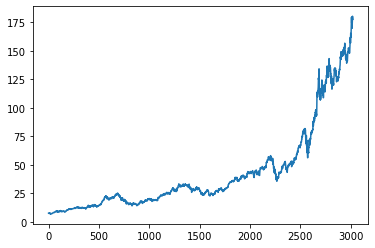

In [9]:
plt.plot(df.Close)

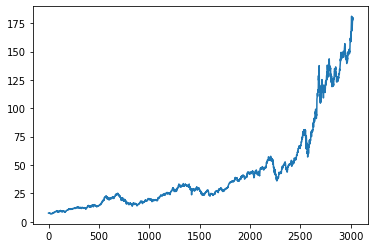

In [10]:
plt.plot(df.Open)

In [11]:
ma100 = df.close.rolling(100).mean()
ma100

AttributeError: 'DataFrame' object has no attribute 'close'

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

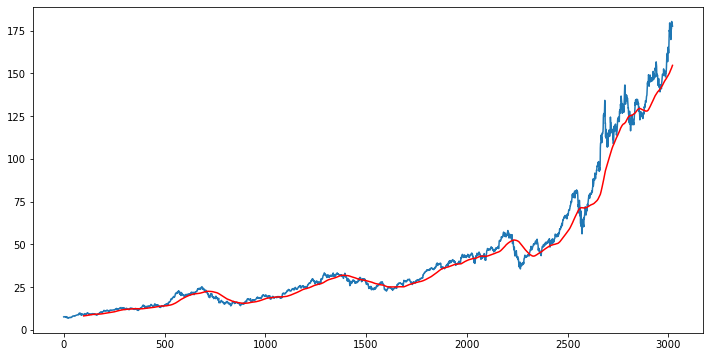

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

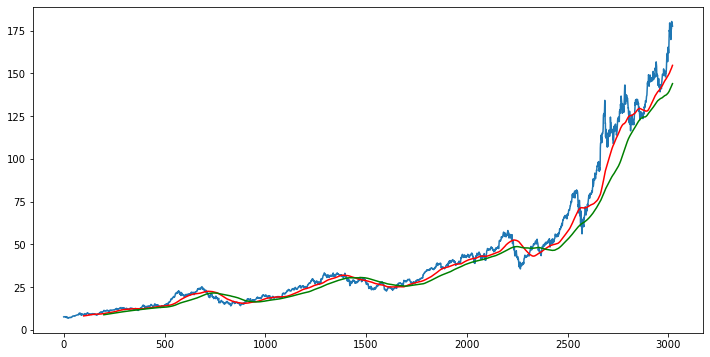

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [17]:
data_testing.head

<bound method NDFrame.head of            Close
2115   46.974998
2116   46.875000
2117   46.717499
2118   47.560001
2119   47.957500
...          ...
3017  180.330002
3018  179.289993
3019  179.380005
3020  178.199997
3021  177.570007

[907 rows x 1 columns]>

In [18]:
data_training.head

<bound method NDFrame.head of           Close
0      7.526071
1      7.643214
2      7.656429
3      7.534643
4      7.520714
...         ...
2110  46.907501
2111  46.790001
2112  47.090000
2113  47.037498
2114  47.145000

[2115 rows x 1 columns]>

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training.head

<bound method NDFrame.head of           Close
0      7.526071
1      7.643214
2      7.656429
3      7.534643
4      7.520714
...         ...
2110  46.907501
2111  46.790001
2112  47.090000
2113  47.037498
2114  47.145000

[2115 rows x 1 columns]>

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [22]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(2015, 100, 1)

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
x_train.shape

(2015, 100, 1)

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))





model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))





model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))





model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 27s 296ms/step - loss: 0.0479
Epoch 2/50
63/63 [==============================] - 22s 347ms/step - loss: 0.0084
Epoch 3/50
63/63 [==============================] - 19s 303ms/step - loss: 0.0075
Epoch 4/50
63/63 [==============================] - 20s 313ms/step - loss: 0.0073
Epoch 5/50
63/63 [==============================] - 26s 410ms/step - loss: 0.0060
Epoch 6/50
63/63 [==============================] - 21s 335ms/step - loss: 0.0061
Epoch 7/50
63/63 [==============================] - 20s 322ms/step - loss: 0.0063
Epoch 8/50
63/63 [==============================] - 19s 303ms/step - loss: 0.0055
Epoch 9/50
63/63 [==============================] - 20s 316ms/step - loss: 0.0056
Epoch 10/50
63/63 [==============================] - 19s 305ms/step - loss: 0.0052
Epoch 11/50
63/63 [==============================] - 18s 286ms/step - loss: 0.0048
Epoch 12/50
63/63 [==============================] - 18s 286ms/step - loss: 0.0051
Epoch 13/50
6

In [29]:
model.save('keras_aniduuu.h5')

In [30]:
#data testing model
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\ANIMESH\AppData\Local\Temp\ipykernel_13128\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [33]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [55]:
input_data = scaler.transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [56]:
input_data.shape


(1007, 1)

In [57]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [58]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [59]:
#making predictions
y_predicted = model.predict(x_test)

29/29 [==============================] - 4s 127ms/step


In [60]:
y_predicted.shape

(907, 1)

In [61]:
y_test


array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [62]:
y_predicted

array([[0.15862906],
       [0.15907764],
       [0.15945512],
       [0.15976429],
       [0.1600361 ],
       [0.16031095],
       [0.16062686],
       [0.16100945],
       [0.16146176],
       [0.16195878],
       [0.16246626],
       [0.16296247],
       [0.1634192 ],
       [0.1638168 ],
       [0.1641308 ],
       [0.16434687],
       [0.16444196],
       [0.16441305],
       [0.1642648 ],
       [0.16400853],
       [0.16364497],
       [0.16319945],
       [0.16270162],
       [0.16219051],
       [0.16169661],
       [0.16125792],
       [0.16087453],
       [0.16054925],
       [0.16030285],
       [0.1601681 ],
       [0.16015913],
       [0.16025192],
       [0.16043854],
       [0.16071019],
       [0.16104765],
       [0.16143245],
       [0.16183676],
       [0.1622468 ],
       [0.1626486 ],
       [0.16303146],
       [0.16339867],
       [0.16376884],
       [0.16414967],
       [0.16451445],
       [0.16482979],
       [0.16507554],
       [0.16533715],
       [0.165

In [63]:
scaler.scale


AttributeError: 'MinMaxScaler' object has no attribute 'scale'

In [ ]:
scaler.scale_


In [ ]:
scale factor = 1/0.00690691
y_predicted = y_predicted*scalefactor
y_test = y_test*scale_factor

In [ ]:
scalefactor = 1/0.00690691
y_predicted = y_predicted*scalefactor
y_test = y_test*scale_factor

In [ ]:
scale factor = 1/0.00690691
y_predicted = y_predicted*scalefactor
y_test = y_test*scalefactor

In [ ]:
scalefactor = 1/0.00690691
y_predicted = y_predicted*scalefactor
y_test = y_test*scalefactor

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'p', label = 'original price')
plt.plot(y_predicted,'r', label = 'original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

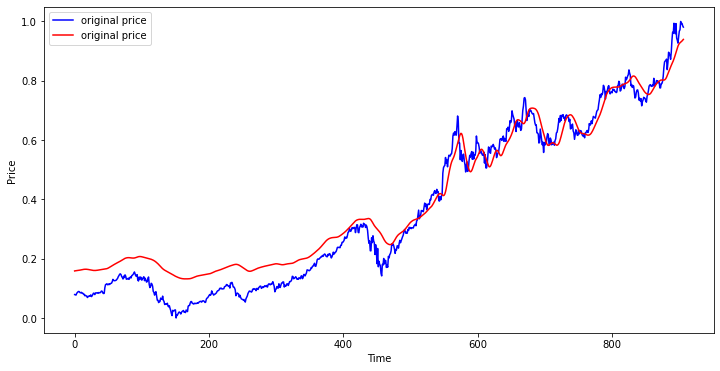

In [64]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b', label = 'original price')
plt.plot(y_predicted,'r', label = 'original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

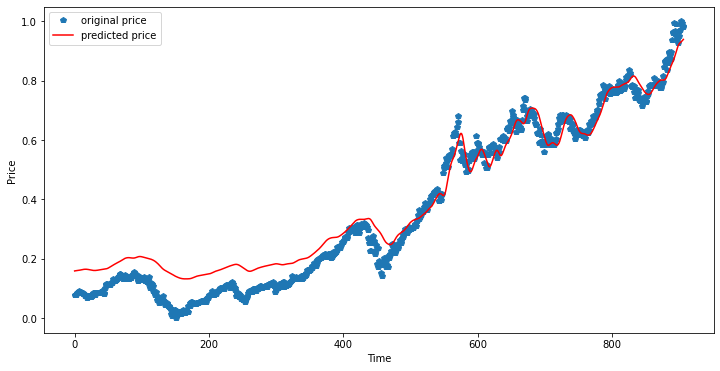

In [65]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'p', label = 'original price')
plt.plot(y_predicted,'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

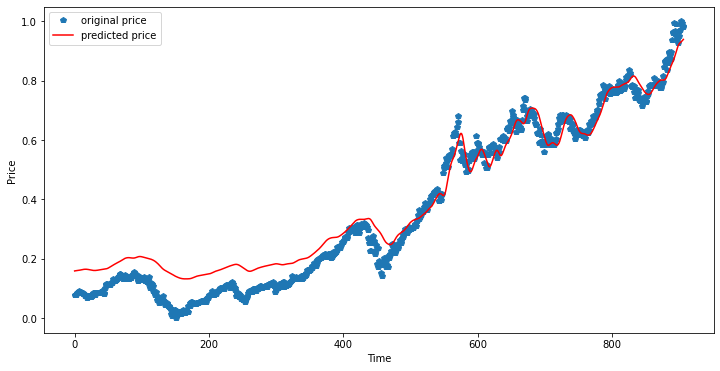

In [66]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'p', label = 'original price')
plt.plot(y_predicted,'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

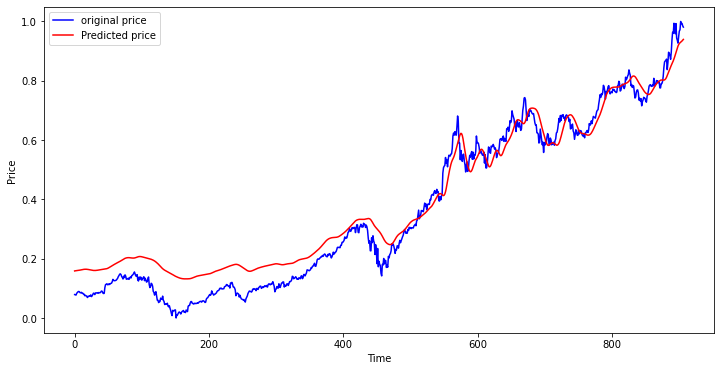

In [67]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b', label = 'original price')
plt.plot(y_predicted,'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()